In [231]:
# Setup
import matplotlib
import numpy as np
import scipy as sp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd
import ggplot
%matplotlib inline

In [232]:
# Start an inference server

from venture.shortcuts import *
v = make_church_prime_ripl()
# x = Puma().make_church_prime_ripl()

In [233]:
# Forget everything

v.clear()

In [234]:
# Specify model 1

v.assume("m", "(flip)")
v.assume("model", "(if m 1 2)")

# Set priors and psuedopriors
v.assume("intercept_1", "(if (eq model 1) (normal -1 10) (uniform_continuous 3.5 4.5))")
v.assume("intercept_2", "(if (eq model 2) (normal 9 10) (uniform_continuous 3.5 4.5))")

v.assume("beta", "(normal 1 .5)")

# v.assume("offset_1", "(uniform_continuous -1 1)")
# v.assume("offset_2", "(uniform_continuous -1 1)")
# v.assume("beta_1", "(if m (uniform_continuous -1 1) 0)")
# v.assume("quadratic", "(flip 0.5)")
# v.assume("beta_2", "(if quadratic (uniform_continuous -1 1) 0)")
v.assume("noise_sd", "(exp (normal 0 2))")

v.assume("f_1", "(lambda (x) (+ intercept_1 (* beta x)))")
v.assume("f_2", "(lambda (x) (+ intercept_2 (* beta x)))")

# v.assume("cluster_membership", "(mem (lambda (index) (if (flip) 1 2)))")

v.assume("f", "(lambda (x) (if (eq model 1) (f_1 x) (f_2 x)))")

'<procedure>'

In [235]:
# Does it work?
v.sample("model")

1.0

In [236]:
# Create data

X_1 = np.random.gamma(1, 1, 10)
Y_1 = +4 + 1 * X_1 + 0.0 * X_1 * X_1
Y_1 += 0.1 * np.random.randn(*X_1.shape)

X_2 = np.random.gamma(1, 1, 10)
Y_2 = +4 + 1 * X_2
Y_2 += 0.1 * np.random.randn(*X_2.shape)

X_3 = np.random.gamma(1, 1, 15)
Y_3 = +4 + 1 * X_3
Y_3 += 0.1 * np.random.randn(*X_3.shape)

X = np.concatenate((X_1, X_2, X_3))
Y = np.concatenate((Y_1, Y_2, Y_3))

In [237]:
# Observe data

for x, y in (zip(X, Y)):
    v.observe("(normal (f %f) noise_sd)" % (x), y)

In [238]:
v.sample("model")

1.0

In [242]:
samples = list()

for _ in range(30):

    v.infer(1000)

    model = v.sample("model")
    
    samples.append(model)
    
print(samples)



[1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


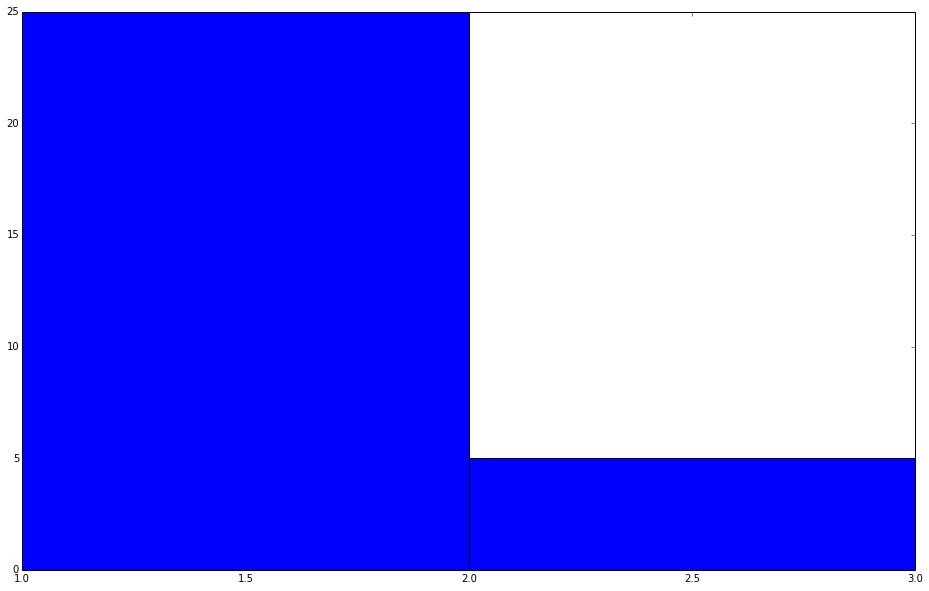

In [243]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.clf()

plt.hist(samples, bins=[0,1,2,3,4,5]) # Pyplot does dumb things with bins when left alone.

plt.show()

In [240]:
# samples = list()

# for _ in range(100):

#     v.infer(100)

#     betas = v.sample("intercept_2")
    
#     samples.append(betas)
    
# print(samples)

[4.489387801615521, 3.6748661783058196, 3.847963966196403, 3.790995262330398, 3.7773694419302046, 3.80271527194418, 3.9036611386109143, 4.483316781697795, 4.311433230526745, 3.5028226564172655, 3.878839294658974, 3.9971739694010466, 4.185021835612133, 4.107988423667848, 3.6684629465453327, 3.9002885362133384, 3.610016776015982, 4.444317043758929, 4.451214173575863, 4.404081916436553, 3.56666427385062, 3.536900744540617, 4.275782990735024, 3.6871563175227493, 4.441103080986068, 4.231716258684173, 3.6978876758366823, 4.374279588228092, 3.5716039531398565, 3.9225086064543575, 3.8409439355600625, 3.5807857010513544, 3.910304545192048, 3.6867837724275887, 3.7816326410975307, 4.328457470983267, 3.7956628701649606, 4.142318486701697, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.969018739026228, 3.967666540091857, 3.967666540091857, 3.967666540091857, 3.96766654009185

In [241]:
# samples = list()

# for _ in range(100):

#     v.infer(100)

#     betas = v.sample("intercept_1")
    
#     samples.append(betas)
    
# print(samples)

[4.448949752608314, 3.7415781766176224, 4.44220201135613, 4.286109941080213, 3.679793908726424, 4.4860009416006505, 4.113229786977172, 3.8993690880015492, 4.058534045005217, 4.446258531883359, 4.421129346359521, 3.5730108097195625, 4.0804413359146565, 4.494956740178168, 3.908457576064393, 4.4245388365816325, 3.5039246494416147, 3.9326188061386347, 3.671260425588116, 4.308647533878684, 3.722846046788618, 3.6773428171873093, 4.097634896403179, 3.7404921180568635, 3.6944683112669736, 4.029396506026387, 3.5159769421443343, 3.7682936375495046, 3.8218164667487144, 3.782717145513743, 4.335436973487958, 4.316177744185552, 3.8869098441209644, 3.9791891467757523, 4.1412126121576875, 3.8757444445509464, 3.651776382466778, 4.398028869414702, 4.077328001847491, 3.5313131930306554, 3.5979214042890817, 4.165445153135806, 4.16430878941901, 3.8084886164870113, 4.055629035457969, 4.151169933145866, 4.180226042168215, 4.255916313035414, 4.004656533244997, 4.238527244655415, 3.6721757997293025, 4.28695406